## Prediction using Supervised ML

### Adding modules

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Loading Data
Loading Data from student data.csv

In [2]:
df=pd.read_csv("student data.csv")

### Exploring Data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting data

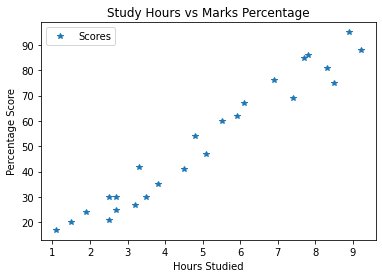

In [6]:
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Study Hours vs Marks Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Splitting Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values  , df.iloc[:, 1].values, 
                            test_size=0.25, random_state=1) 

### Modeling

In [8]:
model = LR()  
model.fit(X_train, y_train) 

LinearRegression()

### Model data

In [9]:
print("Co-efficient:",model.coef_)
print("Intercept:",model.intercept_)

Co-efficient: [10.26720911]
Intercept: -1.1420287231153807


### Plotting the predicted line

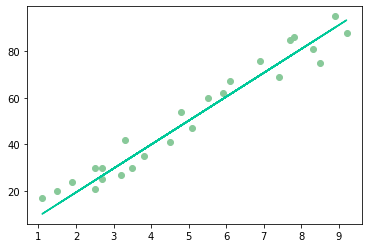

In [14]:
predicted_line = model.coef_*df.iloc[:, :-1].values +model.intercept_
plt.scatter(df.iloc[:, :-1].values  , df.iloc[:, 1].values,color = '#88c999')
plt.plot(df.iloc[:, :-1].values  , predicted_line,color = '#00c999');
plt.show()

### Testing on test data

In [18]:
y_predicted=model.predict(X_test)

### Comparing 

In [25]:
comp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
comp_df

,Actual,Predicted
0,17,10.151901
1,42,32.739761
2,24,18.365669
3,75,86.129249
4,54,48.140575
5,85,77.915481
6,67,61.487947


### Evaluating on test data

In [19]:
print(mean_absolute_error(y_test,y_predicted))
print(mean_squared_error(y_test,y_predicted))
print(r2_score(y_test,y_predicted))

7.3325591780007136
57.5943340325319
0.8980888932690285


### Evaluating on all data

In [23]:
y_predicted_all=model.predict(df.iloc[:, :-1].values )

In [24]:
print(mean_absolute_error(df.iloc[:, 1].values,y_predicted_all))
print(mean_squared_error(df.iloc[:, 1].values,y_predicted_all))
print(r2_score(df.iloc[:, 1].values,y_predicted_all))

5.252605368677215
31.712890128343194
0.9483376870680649
